# Faces

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

column = ['forehead_width', 'cheeks_width', 'jawline', 'face', 'type']
df = pd.read_csv('faces.csv', names=column)
df.head(300)

,forehead_width,cheeks_width,jawline,face,type
0,13.734412,12.367397,17.727732,18.044504,square
1,20.422939,11.449610,15.774867,19.750843,square
2,13.169055,11.898801,13.916852,22.163556,square
3,12.270533,11.923147,16.648587,16.816854,square
4,15.848748,14.381366,16.513414,15.231728,square
...,...,...,...,...,...
295,15.270060,14.919037,17.750000,15.345457,triangle
296,15.240141,15.510706,17.750000,15.345457,triangle
297,15.200723,15.316082,17.750000,15.345457,triangle
298,15.372194,15.343239,17.750000,15.345457,triangle


In [4]:
df.describe()

,forehead_width,cheeks_width,jawline,face
count,600.000000,600.000000,600.000000,600.000000
mean,13.602732,12.963143,14.418586,18.969481
std,1.840389,1.290045,2.041782,2.289266
min,9.179306,8.189176,9.115659,13.094244
25%,12.120000,12.120000,12.711863,16.970370
50%,12.998000,12.490904,14.327400,20.120000
75%,15.113771,13.599873,15.398433,20.887000
max,21.649006,17.087449,20.362684,23.404060


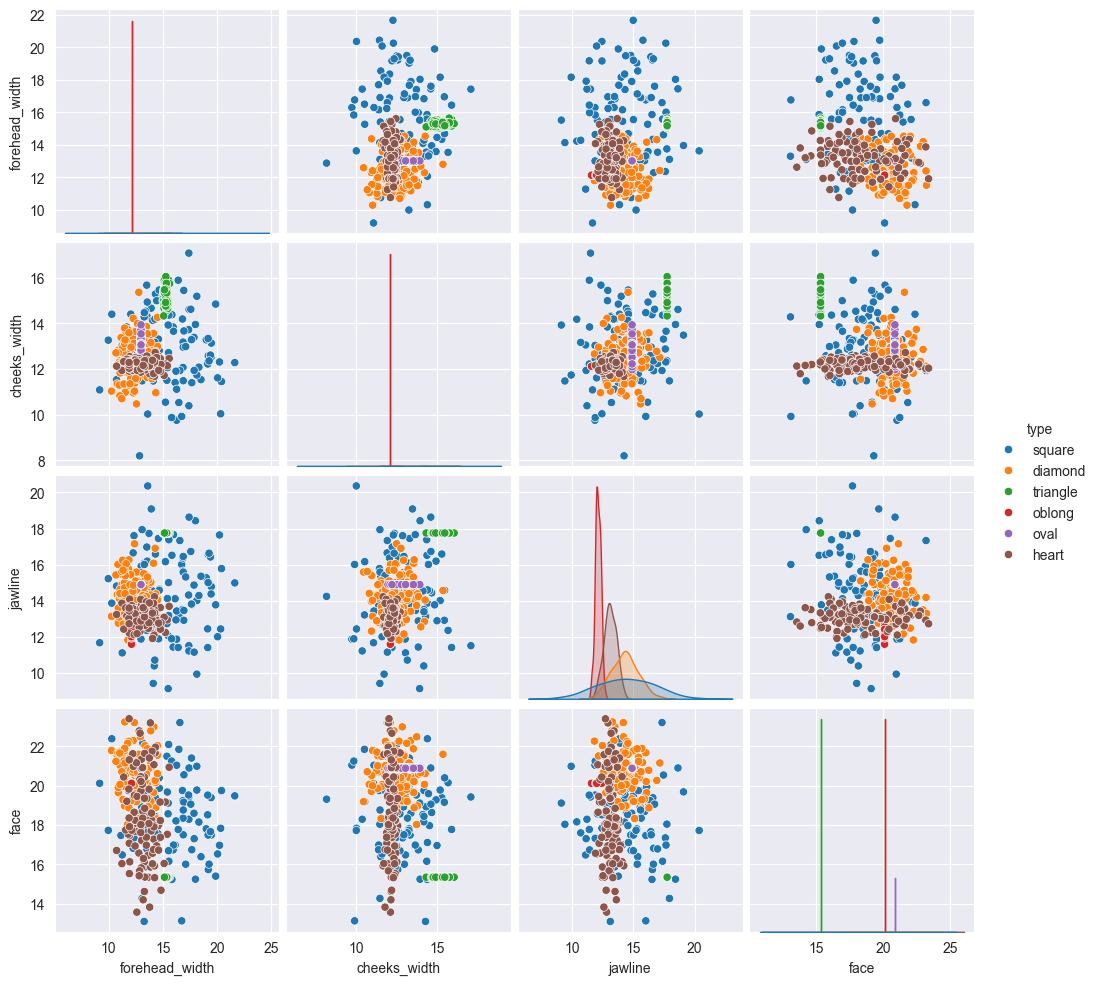

In [5]:
sns.pairplot(df, hue='type')

In [68]:
data = df.values
X = data[:,0:4]
Y = data[:,4]
Y_data = np.array([np.average(X[:,i][Y==j].astype('float32')) for i in range(X.shape[1]) for j in (np.unique(Y))])
Y_data_reshaped = Y_data.reshape(4,6)
Y_data_reshaped = np.swapaxes(Y_data_reshaped,0,1)
X_axis = np.arange(len(column)-1)
width = 0.1

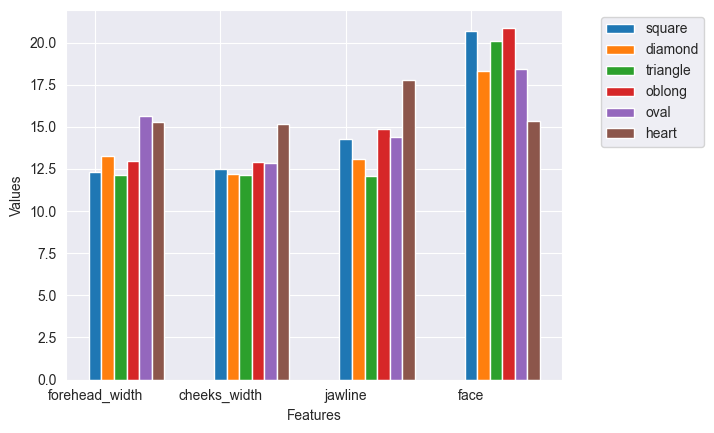

In [70]:
plt.bar(X_axis,Y_data_reshaped[0], width,label = 'square')
plt.bar(X_axis+width,Y_data_reshaped[1],width,label ='diamond')
plt.bar(X_axis+width*2,Y_data_reshaped[2],width,label ='triangle')
plt.bar(X_axis+width*3,Y_data_reshaped[3],width,label ='oblong')
plt.bar(X_axis+width*4,Y_data_reshaped[4],width,label ='oval')
plt.bar(X_axis+width*5,Y_data_reshaped[5],width,label ='heart')
plt.xticks(X_axis,column[:4])
plt.xlabel('Features')
plt.ylabel('Values')
plt.legend(bbox_to_anchor=(1.3, 1))
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3)
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train,Y_train)
prediction = svn.predict(X_test)
print(prediction)

['diamond' 'oval' 'heart' 'oval' 'oblong' 'triangle' 'heart' 'diamond'
 'heart' 'oval' 'triangle' 'oval' 'diamond' 'triangle' 'diamond' 'oblong'
 'square' 'triangle' 'oblong' 'oval' 'diamond' 'oblong' 'oblong' 'square'
 'oval' 'oblong' 'oval' 'oblong' 'triangle' 'square' 'oblong' 'triangle'
 'oval' 'triangle' 'oval' 'oval' 'heart' 'heart' 'diamond' 'heart' 'oval'
 'oblong' 'triangle' 'oblong' 'oval' 'heart' 'heart' 'oblong' 'oval'
 'square' 'oval' 'square' 'triangle' 'oblong' 'triangle' 'oblong' 'oval'
 'oblong' 'oval' 'oblong' 'diamond' 'triangle' 'heart' 'oblong' 'oval'
 'diamond' 'diamond' 'square' 'diamond' 'heart' 'heart' 'diamond' 'heart'
 'diamond' 'triangle' 'oval' 'oblong' 'heart' 'oval' 'square' 'oval'
 'oblong' 'heart' 'oblong' 'square' 'oval' 'square' 'oval' 'square'
 'triangle' 'oval' 'triangle' 'triangle' 'diamond' 'oval' 'triangle'
 'oblong' 'diamond' 'heart' 'oblong' 'oval' 'triangle' 'oval' 'oval'
 'triangle' 'triangle' 'oblong' 'diamond' 'triangle' 'diamond' 'triangle

In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,prediction)
print(accuracy)

0.8333333333333334


In [13]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

     diamond       0.64      0.48      0.55        29
       heart       0.81      0.73      0.77        30
      oblong       0.84      1.00      0.91        32
        oval       0.71      1.00      0.83        27
      square       1.00      0.73      0.84        26
    triangle       1.00      1.00      1.00        36

    accuracy                           0.83       180
   macro avg       0.83      0.82      0.82       180
weighted avg       0.84      0.83      0.83       180


In [15]:
X_new = np.array([[13.30490753,12.42994798,13.20663149,20.43710964]])
prediction = svn.predict(X_new)
print('Prediction of Species:\t{}'.format(prediction))

Prediction of Species:	['diamond']


In [67]:
with open('faces_list.csv') as f:
    lst = f.read().split('\n')
    lst = lst[1:]
    new = []
    for i in lst:
        new += i.split(',')
    for i in range(len(new)):
        if i%4 == 0:
            if not new[i - 4:i:]:
                continue
            X_new = np.array([new[i-4:i:]])
            prediction = svn.predict(X_new)
            print(prediction)

[['13.09545547' '11.47819545' '17.93693669' '14.2667487']]
['square']
[['13.93008491' '14.66934759' '14.42873127' '18.6352384']]
['square']
[['14.32592146' '15.29397099' '16.58310407' '19.38736198']]
['square']
[['18.01855992' '13.95299187' '18.4305347' '15.24346708']]
['triangle']
[['15.25240571' '10.54211133' '16.16061584' '19.17812566']]
['square']
[['19.01642984' '13.28130113' '15.26890062' '17.80481608']]
['square']
[['11.13894438' '12.48268513' '16.01402783' '17.46803658']]
['square']
[['13.28757322' '13.26201044' '16.07739734' '19.94372475']]
['oval']
[['11.6776258' '13.84364347' '12.87346201' '18.98051077']]
['oblong']
[['13.00993821' '12.34485136' '15.90889223' '18.68551429']]
['diamond']
[['18.14846227' '15.19335147' '14.00054238' '19.77770058']]
['square']
[['10.80086505' '11.34516365' '14.32861157' '21.52460252']]
['diamond']
[['14.3553326' '10.95846645' '12.30638332' '20.15587027']]
['heart']
[['14.18290935' '12.85853748' '13.48180743' '22.99206794']]
['diamond']
[['11.255